In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Reading file
df= pd.read_csv("/content/Spaceship-Dataset.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Data Preprocesing

In [6]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [7]:
# Function to fill missing values with the mode
def fill_columns_with_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)
    return df

columns_to_fill = ['HomePlanet', 'CryoSleep', 'Cabin', 'VIP', 'Destination']
df = fill_columns_with_mode(df, columns_to_fill)


<ipython-input-7-bb04ac5f610d>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(mode_value)


In [8]:
# Function to fill missing values with the mean
def fill_na_with_mean(df, columns):
    for column in columns:
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)
    return df

columns_to_fill = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df = fill_na_with_mean(df, columns_to_fill)

In [12]:
df.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [26]:
# Droping Unnecessary columns
df= df.drop(["PassengerId","Name"], axis=1)

In [27]:
df.duplicated().sum()

15

In [28]:
# Droping Duplicated
df.drop_duplicates(inplace=True)

In [29]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


## Visualization

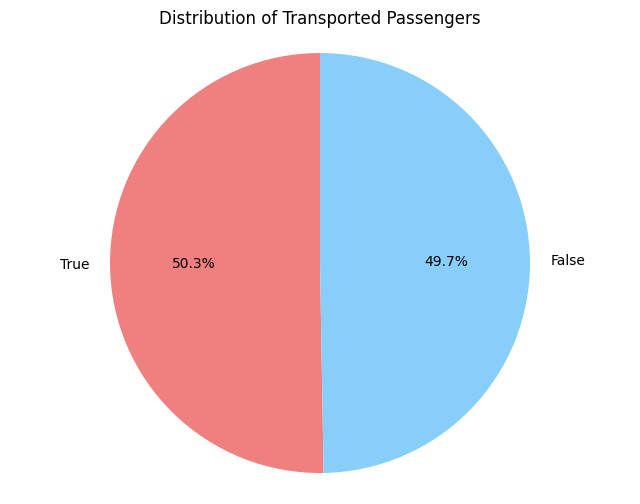

In [17]:
# Distribution of Transported Passengers
def plot_piechart_Transported(df):
    transported_counts = df['Transported'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(transported_counts, labels=transported_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
    plt.title('Distribution of Transported Passengers')
    plt.axis('equal')
    plt.show()
plot_piechart_Transported(df)

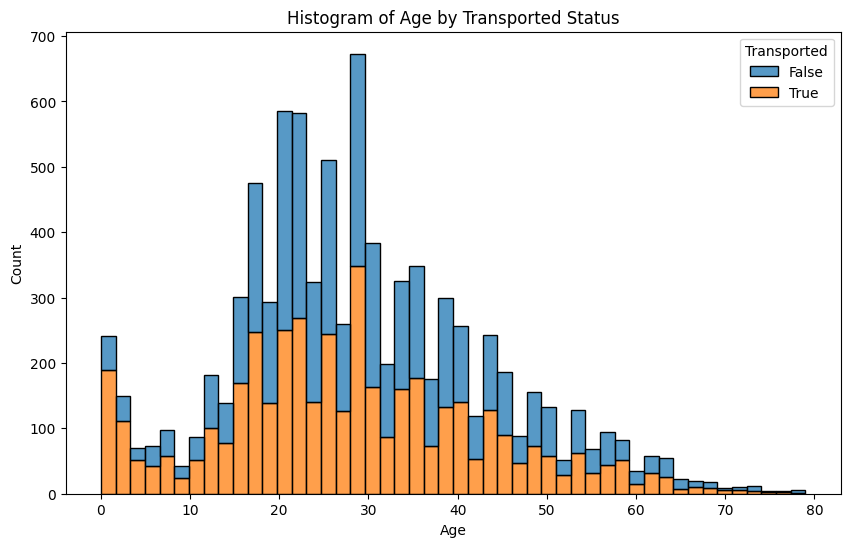

In [18]:
# Ploting Age segmented by Transported status
def plot_age_histogram(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x="Age", hue="Transported", multiple="stack")
    plt.title('Histogram of Age by Transported Status')
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()
plot_age_histogram(df)

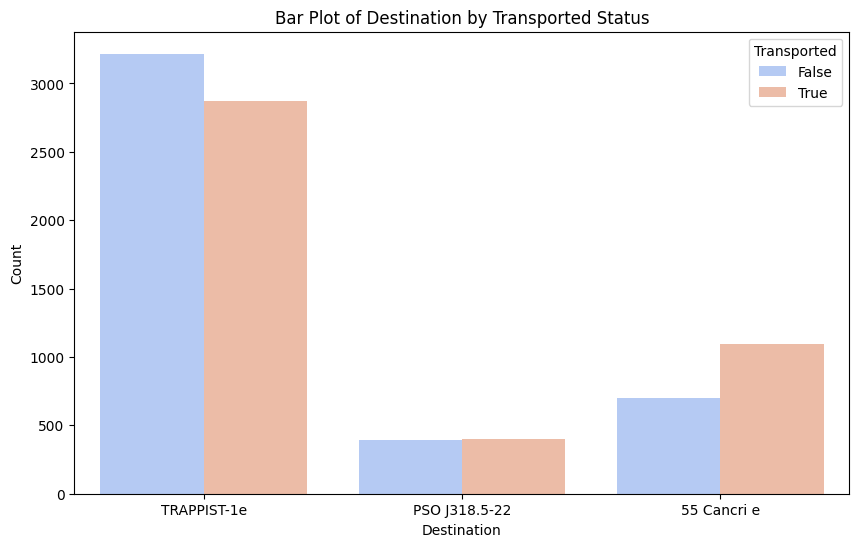

In [19]:
# Ploting Destination segmented by Transported status
def plot_destination_by_transported(df):
    plt.figure(figsize=(10, 6))
    # Setting a custom color palette
    sns.countplot(data=df, x="Destination", hue="Transported", palette="coolwarm")
    plt.title('Bar Plot of Destination by Transported Status')
    plt.xlabel("Destination")
    plt.ylabel("Count")
    plt.show()
plot_destination_by_transported(df)

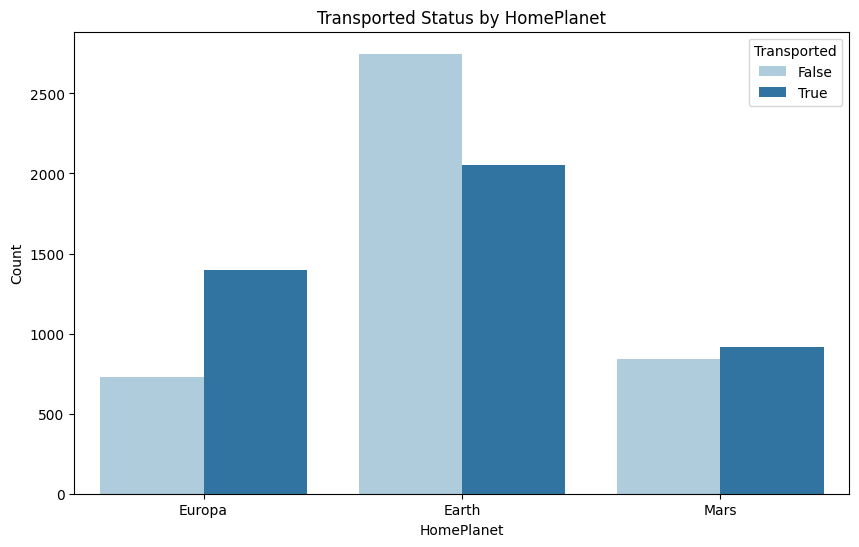

In [20]:
# Ploting HomePlanet segmented by Transported status
def plot_homeplanet_vs_transported(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x="HomePlanet", hue="Transported", palette="Paired")
    plt.title('Transported Status by HomePlanet')
    plt.xlabel("HomePlanet")
    plt.ylabel("Count")
    plt.legend(title="Transported", loc="upper right")
    plt.show()
plot_homeplanet_vs_transported(df)

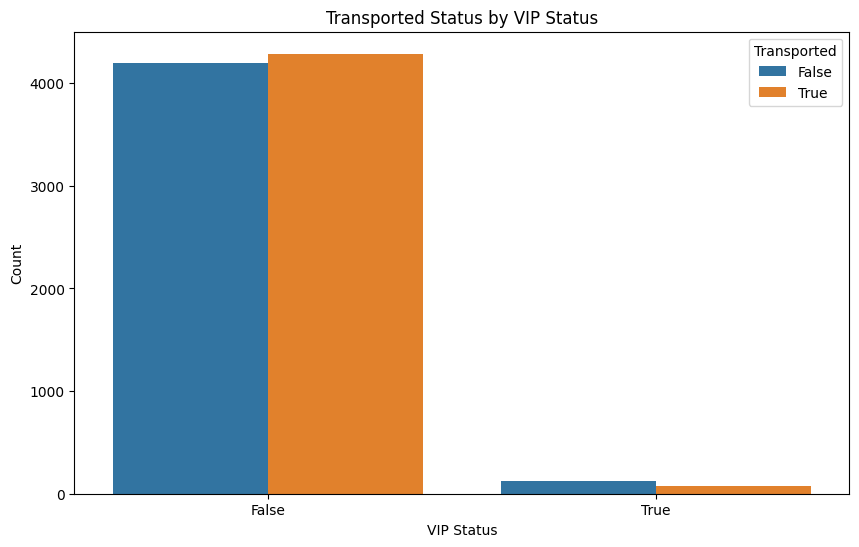

In [21]:
# Ploting VIP status by Transported status
def plot_vip_vs_transported(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x="VIP", hue="Transported")
    plt.title('Transported Status by VIP Status')
    plt.xlabel("VIP Status")
    plt.ylabel("Count")
    plt.legend(title="Transported")
    plt.show()
plot_vip_vs_transported(df)

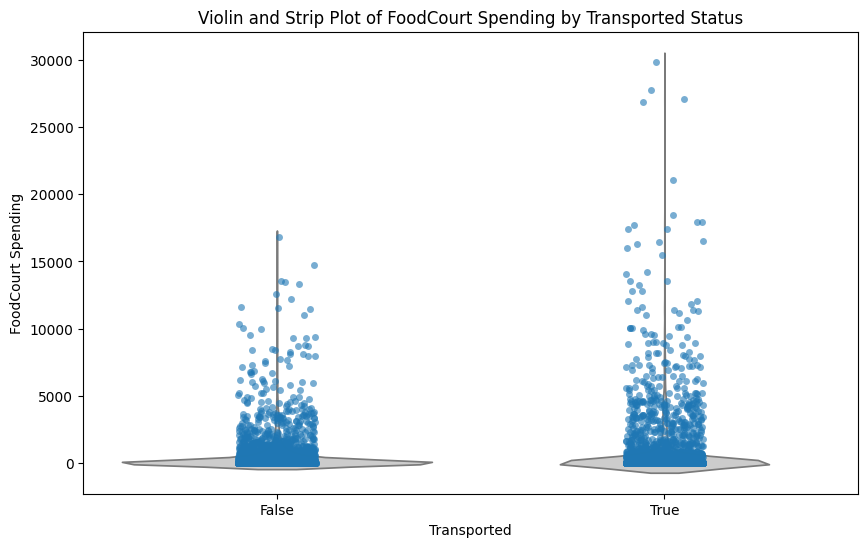

In [22]:
# Ploting violin and strip plot of FoodCourt spending by Transported status
def plot_foodcourt_vs_transported_violin_strip(df):
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x="Transported", y="FoodCourt", inner=None, color=".8")
    sns.stripplot(data=df, x="Transported", y="FoodCourt", jitter=True, alpha=0.6)
    plt.title('Violin and Strip Plot of FoodCourt Spending by Transported Status')
    plt.xlabel("Transported")
    plt.ylabel("FoodCourt Spending")
    plt.show()
plot_foodcourt_vs_transported_violin_strip(df)

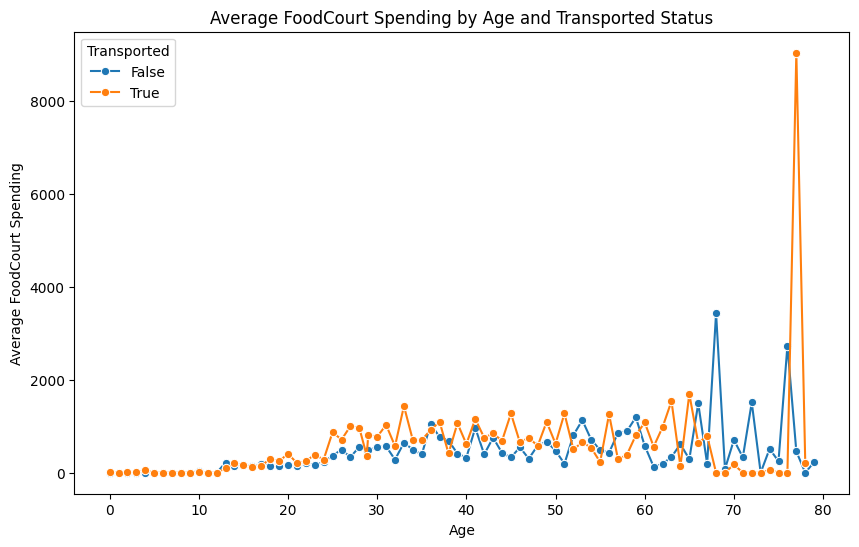

In [23]:
# Ploting line plot of average FoodCourt spending by Age, segmented by Transported status
def plot_foodcourt_vs_age_line(df):
    df_sorted = df.sort_values(by="Age")
    df_avg_foodcourt = df_sorted.groupby(['Age', 'Transported'])['FoodCourt'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_avg_foodcourt, x="Age", y="FoodCourt", hue="Transported", marker="o")
    plt.title('Average FoodCourt Spending by Age and Transported Status')
    plt.xlabel("Age")
    plt.ylabel("Average FoodCourt Spending")
    plt.legend(title="Transported")
    plt.show()
plot_foodcourt_vs_age_line(df)

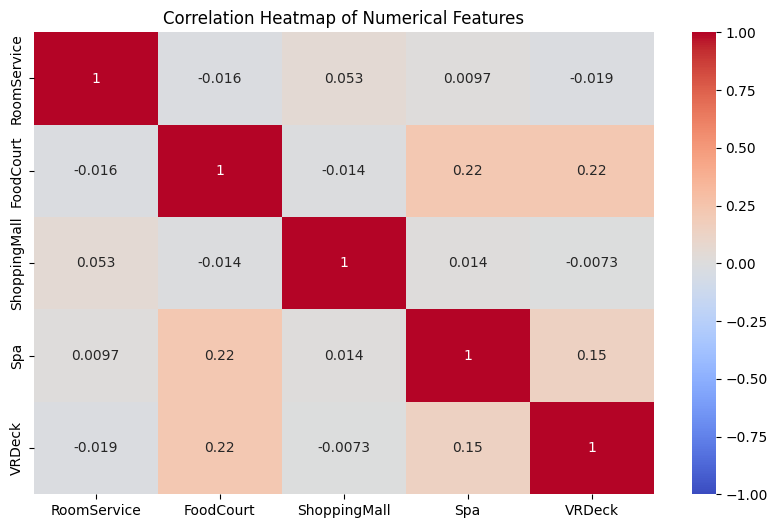

In [24]:
# Correlation Heatmap
def plot_correlation_heatmap(df):
    plt.figure(figsize=(10, 6))
    corr = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation Heatmap of Numerical Features")
    plt.show()
plot_correlation_heatmap(df)